### Homework 4

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.


Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. To do more create tutorials on how to use Map reduce for different analysis that were not assigned in this HW.

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

### Content

I created a script to convert alice.txt and bible+shakes.nonpunc.txt into a list and 

I then created MRJOB scripts for monograms,bigrams and Trigrams.



##Homework 4.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [1]:
pwd

u'C:\\Users\\gaurav\\Anaconda\\big-data-python-class-master (1)\\big-data-python-class-master\\Lectures\\Lecture5-MapReduce\\code_1'

In [ ]:
# %load MRBigramorderWordFrequencyCounter
from mrjob.job import MRJob
from mrjob.step import MRStep
from collections import defaultdict
from collections import Counter
from operator import itemgetter
import re
from operator import itemgetter

WORD_RE = re.compile(r"[\w']+")

class MRWordFrequencyCountnew_1(MRJob):

      def steps(self) :
          return [
              MRStep(mapper=self.mapper_get_words,
                     combiner=self.combiner_get_words,
                     reducer=self.reducer_get_words),
              MRStep(reducer=self.reducer_find_max_10_words)
        ]
    
      def mapper_get_words(self, _ , line):
          i=0 
          wordcheck=[]
          bigram=[]
          wordcheck=line.split()
          m=len(wordcheck)
          for word in wordcheck[i:] :
              if m>i+1 :
                 bigram.append(wordcheck[i]+wordcheck[i+1])
                 i=i+1
          for word in re.findall(WORD_RE,"  ".join(bigram)) :
              yield word.lower(),1
        
      def combiner_get_words(self, word, counts) :
          yield word, sum(counts)

      def reducer_get_words(self, word, counts) :
          yield  None,(sum(counts),word)
		  #yield None,(word, sum(counts))

      def reducer_find_max_10_words(self, _ , word_count_pairs):
          lst=list(word_count_pairs)
          lst.sort()
          lst.reverse()
          return lst[0:10]
          

if __name__ == '__main__':
    MRWordFrequencyCountnew_1.run()

In [1]:
pwd

u'C:\\Users\\gaurav\\Anaconda\\big-data-python-class-master (1)\\big-data-python-class-master\\Lectures\\Lecture5-MapReduce\\code_1'

In [ ]:
# %load filelistconverter.py
import re
import pickle
list = []
f = open("bible+shakes.nopunc.txt", "r")

# Loop through all lines.
for line in f.readlines():
    # Strip each line to remove trailing newline.
    #line.strip()
    #line=re.sub(r'\s+','',line)
    #line=re.sub(r"\n",'',line)
    #line=' '.join(line.split())
    #line=' '.join(line.split(,))
    #line=' '.join(line.split(.))
    #line=re.sub(r"\'",'',line)
    #line=re.sub(r"\t",'',line)
    line=re.sub(r",",'',line)
    line=re.sub(r"'",'',line)
    line=re.sub(r"!",'',line)
    line=re.sub(r":",'',line)
    line=re.sub(r"\*",'',line)
    line=re.sub(r"-",'',line)
    line=re.sub(r"_",'',line)
    line=re.sub(r"\.",'',line)
    line=re.sub(r"\(",'',line)
    line=re.sub(r"\)",'',line)
    line=re.sub(r"`",'',line)
    line=re.sub(r"\?",'',line)
    line=re.sub(r";",'',line)
    line=' '.join(line.split())
    #line.lstrip(line)
    #re.split('\s+', s)
    #line.rstrip(line)
    #line.rstrip("\n")
    #" ".join(line.strip())
    list.append(line)               
    list.append("")
    #f.write(line)
    #text2=re.sub(r'\r','','\r\r\r\r                ALICE\'S ADVENTURES IN WONDERLAND\r\r ')
    #" ".join(line.strip()
    #list.append(line)
    #" ".join(line.strip())
#f.close()
#pickle.dump(list, "code_1/alice30.txt")
#initial[i,j]=random.randrange(0,size)
file1=open("bible+shakes.nopunc_1.txt",'w')
for item in list:
     #file1.write("%s\n" % item)
      file1.write(item)
#file.write(initial)
file1.close()


In [16]:
% run filelistconverter.py

In [15]:
% run MRBigramorderWordFrequencyCounter.py  bible+shakes.nopunc_1.txt

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
creating tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.11200

13082	"ofthe"
7071	"andthe"
7020	"thelord"
6783	"inthe"
3822	"tothe"
3519	"iwill"
3022	"andhe"
3016	"shallbe"
2733	"allthe"
2717	"ihave"


removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000
INFO:mrjob.runner:removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramorderWordFrequencyCounter.gaurav.20151129.155459.112000


##Homework 4.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [ ]:
# %load filelistconverter2.py
import re
import pickle
list = []
f = open("alice29.txt", "r")

# Loop through all lines.
for line in f.readlines():
    # Strip each line to remove trailing newline.
    #line.strip()
    #line=re.sub(r'\s+','',line)
    #line=re.sub(r"\n",'',line)
    #line=' '.join(line.split())
    #line=' '.join(line.split(,))
    #line=' '.join(line.split(.))
    #line=re.sub(r"\'",'',line)
    #line=re.sub(r"\t",'',line)
    line=re.sub(r",",'',line)
    line=re.sub(r"'",'',line)
    line=re.sub(r"!",'',line)
    line=re.sub(r":",'',line)
    line=re.sub(r"\*",'',line)
    line=re.sub(r"-",'',line)
    line=re.sub(r"_",'',line)
    line=re.sub(r"\.",'',line)
    line=re.sub(r"\(",'',line)
    line=re.sub(r"\)",'',line)
    line=re.sub(r"`",'',line)
    line=re.sub(r"\?",'',line)
    line=re.sub(r";",'',line)
    line=' '.join(line.split())
    #line.lstrip(line)
    #re.split('\s+', s)
    #line.rstrip(line)
    #line.rstrip("\n")
    #" ".join(line.strip())
    list.append(line)
    list.append(" ")
    #f.write(line)
    #text2=re.sub(r'\r','','\r\r\r\r                ALICE\'S ADVENTURES IN WONDERLAND\r\r ')
    #" ".join(line.strip()
    #list.append(line)
    #" ".join(line.strip())
#f.close()
#pickle.dump(list, "code_1/alice30.txt")
#initial[i,j]=random.randrange(0,size)
file1=open("alice32.txt",'w')
for item in list:
     #file1.write("%s\n" % item)
      file1.write(item)
#file.write(initial)
file1.close()


In [22]:
% run filelistconverter2.py  alice29.txt

In [ ]:
# %load MRBigramOrderlessWordFrequencyCounter.py
from mrjob.job import MRJob
from mrjob.step import MRStep
from collections import defaultdict
from collections import Counter
from operator import itemgetter
import re
from operator import itemgetter

WORD_RE = re.compile(r"[\w']+")

class MRWordFrequencyCountnew_2(MRJob):

      def steps(self) :
          return [
              MRStep(mapper=self.mapper_get_words,
                     combiner=self.combiner_get_words,
                     reducer=self.reducer_get_words),
              MRStep(reducer=self.reducer_find_max_10_words)
        ]
    
      def mapper_get_words(self, _ , line):
          i=0 
          wordcheck=[]
          bigram=[]
          wordcheck=line.split()
          m=len(wordcheck)
          for word in wordcheck[i:] :
              if m>i+1:
                  p=wordcheck[i]
                  q=wordcheck[i+1]
                  seq =(p,q)
                  seq = sorted(seq)
                  #wordFirst = seq[0] 
                  #wordSecond = seq[1]
                  wordNew = "".join(seq)
                  bigram.append(wordNew)
                  i=i+1
				  
          for word in re.findall(WORD_RE," ".join(bigram)) :
              yield word.lower(),1
        
      def combiner_get_words(self, word, counts) :
          yield word, sum(counts)

      def reducer_get_words(self, word, counts) :
          yield  None,(sum(counts),word)
		  #yield None,(word, sum(counts))

      def reducer_find_max_10_words(self, _ , word_count_pairs):
          lst=list(word_count_pairs)
          lst.sort()
          lst.reverse()
          return lst[0:10]
          

if __name__ == '__main__':
    MRWordFrequencyCountnew_2.run()

In [17]:
% run MRBigramOrderlessWordFrequencyCounter.py  alice32.txt

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
creating tmp d

208	"saidthe"
128	"ofthe"
126	"alicesaid"
95	"ain"
81	"andthe"
78	"inthe"
75	"itwas"
69	"theto"
67	"queenthe"
65	"kingthe"


removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942.400000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942.400000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942.400000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942.400000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942.400000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942.400000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942.400000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRBigramOrderlessWordFrequencyCounter.gaurav.20151129.160942

Repeating Homework 4.2 for bible+shakes.nonpunc.txt


In [1]:
pwd

u'C:\\Users\\gaurav\\Anaconda\\big-data-python-class-master (1)\\big-data-python-class-master\\Lectures\\Lecture5-MapReduce\\code_1'

In [10]:
% run MRBigramOrderlessWordFrequencyCounter.py    bible+shakes.nopunc_1.txt

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.1345

13082	"ofthe"
7291	"lordthe"
7071	"andthe"
6783	"inthe"
4154	"iwill"
3822	"theto"
3179	"havei"
3142	"andhe"
3018	"beshall"
2913	"ami"


removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000
INFO:mrjob.runner:removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_2.gaurav.20151129.134532.879000


##Homework 4.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [ ]:
# %load MRTrigramOrderlessWordFrequencyCounter
from mrjob.job import MRJob
from mrjob.step import MRStep
from collections import defaultdict
from collections import Counter
from operator import itemgetter
import re
from operator import itemgetter

WORD_RE = re.compile(r"[\w']+")

class MRWordFrequencyCountnew_3(MRJob):

      def steps(self) :
          return [
              MRStep(mapper=self.mapper_get_words,
                     combiner=self.combiner_get_words,
                     reducer=self.reducer_get_words),
              MRStep(reducer=self.reducer_find_max_10_words)
        ]
    
      def mapper_get_words(self, _ , line):
          i=0 
          wordcheck=[]
          trigram=[]
          wordcheck=line.split()
          m=len(wordcheck)
          for word in wordcheck[i:] :
              if m>i+2:
                  p=wordcheck[i]
                  q=wordcheck[i+1]
                  r=wordcheck[i+2]
                  seq =(p,q,r)
                  seq = sorted(seq)
                  #wordFirst = seq[0] 
                  #wordSecond = seq[1]
                  wordNew = "".join(seq)
                  trigram.append(wordNew)
                  i=i+1
          for word in re.findall(WORD_RE," ".join(trigram)) :
              yield word.lower(),1
        
      def combiner_get_words(self, word, counts) :
          yield word, sum(counts)

      def reducer_get_words(self, word, counts) :
          yield  None,(sum(counts),word)
		  #yield None,(word, sum(counts))

      def reducer_find_max_10_words(self, _ , word_count_pairs):
          lst=list(word_count_pairs)
          lst.sort()
          lst.reverse()
          return lst[0:10]
          

if __name__ == '__main__':
    MRWordFrequencyCountnew_3.run()

In [12]:
% run MRTrigramOrderlessWordFrequencyCounter bible+shakes.nopunc_1.txt

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.1440

2054	"lordofthe"
1794	"childrenofthe"
1583	"houseofthe"
1527	"ofsonthe"
1429	"andlordthe"
1025	"landofthe"
866	"lordsaiththe"
858	"ofoutthe"
822	"andiwill"
763	"ofsonsthe"


removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000
INFO:mrjob.runner:removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3Copy.gaurav.20151129.144043.755000


In [26]:
% run MRTrigramOrderlessWordFrequencyCounter.py  alice32.txt

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
INFO:mrjob.conf:no configs found; falling back on auto-configuration
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000
creating tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151

51	"themockturtle"
30	"themarchhare"
29	"saidtheking"
21	"thewhiterabbit"
21	"saidthehatter"
19	"saidtoherself"
19	"saidthemock"
18	"saidthecaterpillar"
17	"shewenton"
17	"shesaidto"


removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000
removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000
INFO:mrjob.runner:removing tmp directory c:\users\gaurav\appdata\local\temp\MRWordFrequencyCountnew_3.gaurav.20151106.210504.281000


##Homework 4.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np

In [ ]:
# %load MRGramCounter.py
from mrjob.job import MRJob
import re

WORD_RE = re.compile(r"[\w']+")

class MRGramCounter(MRJob):
    
    
    def mapper(self, _ , line):
        #yield "chars", len(line)
        i=0
        p=0
        wordcheck=[]
        bigram=[]
        trigram =[]
        wordcheck=line.split()
        m=len(wordcheck)
        yield "monograms", m
        for word in wordcheck[i:]:
            if m>i+1 :
                bigram.append(wordcheck[i]+wordcheck[i+1])
                i=i+1
        #for word in re.findall(WORD_RE,"  ".join(bigram)):
        yield "bigrams",len(bigram)
		
        for word in wordcheck[p:]:
            if m>p+2 :
                trigram.append(wordcheck[p]+wordcheck[p+1]+wordcheck[p+2])
                p=p+1
        yield "trigrams",len(trigram)
		
    #def combiner(self, word, counts):
        #yield word, sum(counts)

    #def reducer(self, word, counts):
		#yield word, sum(counts)
		
		    

if __name__ == '__main__':
    MRGramCounter.run()

In [54]:
!python MRGramCounter.py alice32.txt > today.txt

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
creating tmp directory c:\users\gaurav\appdata\local\temp\MRGramCounter.gaurav.20151107.011418.879000

PLEASE NOTE: Starting in mrjob v0.5.0, protocols will be strict by default. It's recommended you run your job with --strict-protocols or set up mrjob.conf as described at https://pythonhosted.org/mrjob/whats-new.html#ready-for-strict-protocols

writing to c:\users\gaurav\appdata\local\temp\MRGramCounter.gaurav.20151107.011418.879000\step-0-mapper_part-00000
Counters from step 1:
  (no counters found)
Moving c:\users\gaurav\appdata\local\temp\MRGramCounter.gaurav.20151107.011418.879000\step-0-mapper_part-00000 -> c:\users\gaurav\appdata\local\temp\MRGramCounter.gaurav.20151107.011418.879000\output\part-00000
Streaming final output from c:\users\gaurav\appdata\local\temp\MRGramCounter.gaurav.20151107.011418.879000\output
removing tmp directory c:\users\gaurav\appdata\local\temp\MRGr

Monograms  26397
Bigrams  26396
Trigrams  26395


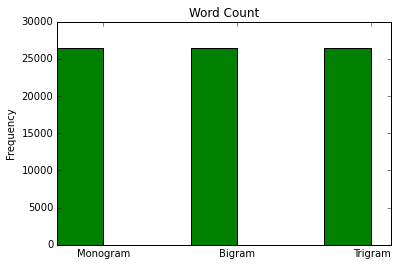

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np

#The count is done for the portion of input file.

#The relationship between monograms, bigrams and trigrams is, every time bigram count is one less than monogram,
#and trigram is two less than monogram.


#The FrequencyCount runner file write the map reduce job results to a 'result.txt' and I am using data from this 
#result file to draw the graph.

f = open('today.txt')
for line in f.readlines():
    if 'bigram' in line:
        bigrams=int(line.split()[-1])
        print 'Bigrams ',bigrams
    elif 'trigram' in line:
        trigrams=int(line.split()[-1])
        print 'Trigrams ',trigrams
    else:
        monograms=int(line.split()[-1])
        print 'Monograms ',monograms
N = 3
WordFrequency = (monograms,bigrams,trigrams)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, WordFrequency, width, color='g')
plt.bar(ind, WordFrequency, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Frequency')
ax.set_title('Word Count')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Monogram', 'Bigram', 'Trigram') )
plt.show

f.close()